## Student Performance Indicator

  ### Life cycle of ML project 
  1. understanding the problem statement
  2. Data Collection
  3. Data checks to perform
  4. EDA
  5. Data pre-processing
  6. Model Training
  7. Choose best model

### 1. Problem statement

   This project understand how the students performance is affected by other variables such as Gender, Ethnicity, Parental level of education , Lunch and test preparation course.

### Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## Data checks to perform 
1. check missing values
2. check duplicates
3. check datatypes
4. check the number of unique value in each column
5. check statistics of each data set
6. check various categories present in the different categorical column

In [5]:
## check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
int(df.duplicated().sum())

0

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. From above description of numerical data all means are very close to each other - between 66 to 68.06
2. all students derivation are also close - between 14.6 and 15.19:


#### Exploring Data

In [9]:
print("categories in 'gender' variable:  ", end=" ")
print(df['gender'].unique())

print("categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education'  variable: ",end=" ")
print(df["parental_level_of_education"].unique())

print("categories in 'lunch' variable ",end=" ")
print(df["lunch"].unique())

print("categories in 'test_preparation_course' variable ",end=" ")
print(df["test_preparation_course"].unique())


categories in 'gender' variable:   ['female' 'male']
categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education'  variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable  ['standard' 'free/reduced']
categories in 'test_preparation_course' variable  ['none' 'completed']


In [10]:
## define numerical and categorical cloumns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O' ]

## print columns
print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print("\nwe have {} categorical_features : {}".format(len(categorical_feature),categorical_feature))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical_features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### Adding columns for "Total score" and "Average"

In [11]:
df['total_score'] = df['math_score'] + df["reading_score"] + df["writing_score"]
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [12]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"number of students with full marks in Maths:   {math_full}")
print(f"number of students with full marks in Writing:   {writing_full}")
print(f"number of students with full marks in Reading:   {reading_full}")


number of students with full marks in Maths:   7
number of students with full marks in Writing:   14
number of students with full marks in Reading:   17


In [13]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"student with less than 20 marks in maths: {math_less_20}")
print(f"student with less than 20 marks in Writing: {writing_less_20}")
print(f"student with less than 20 marks in Reading: {reading_less_20}")



student with less than 20 marks in maths: 4
student with less than 20 marks in Writing: 3
student with less than 20 marks in Reading: 1


From above value we get students have performed the worst in maths 

### Visualization 

#### Visualize average score distribution to make some conclusion

1. histogram 
2. kernel distribution function

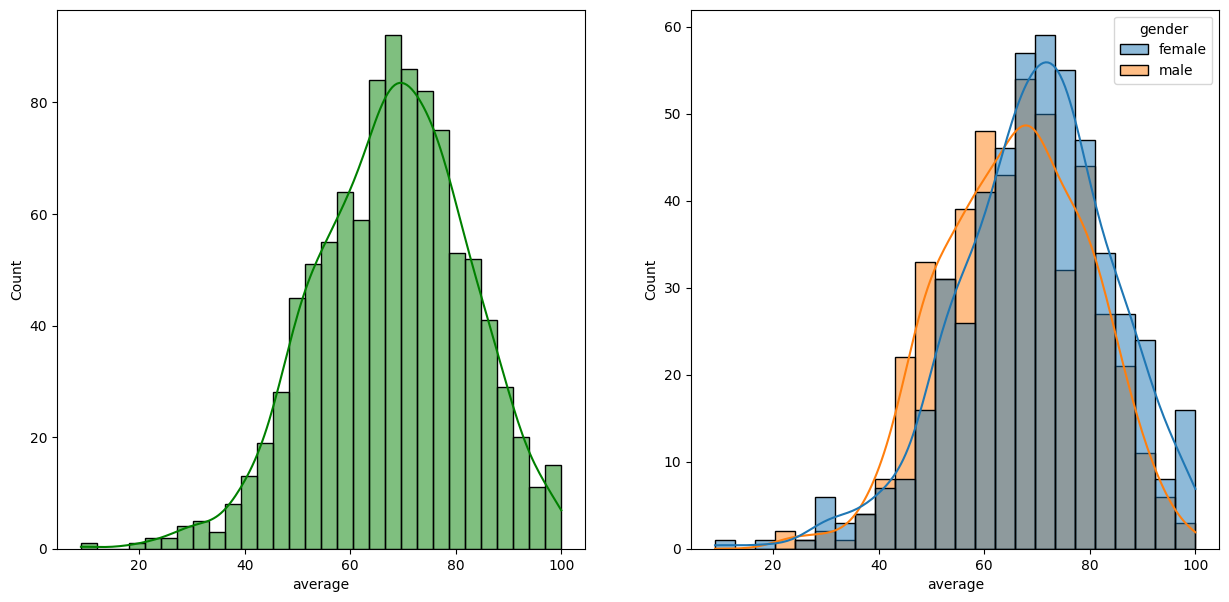

In [14]:
## Histogram and KDE
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()



### Insights
female students tend to perform well then male students

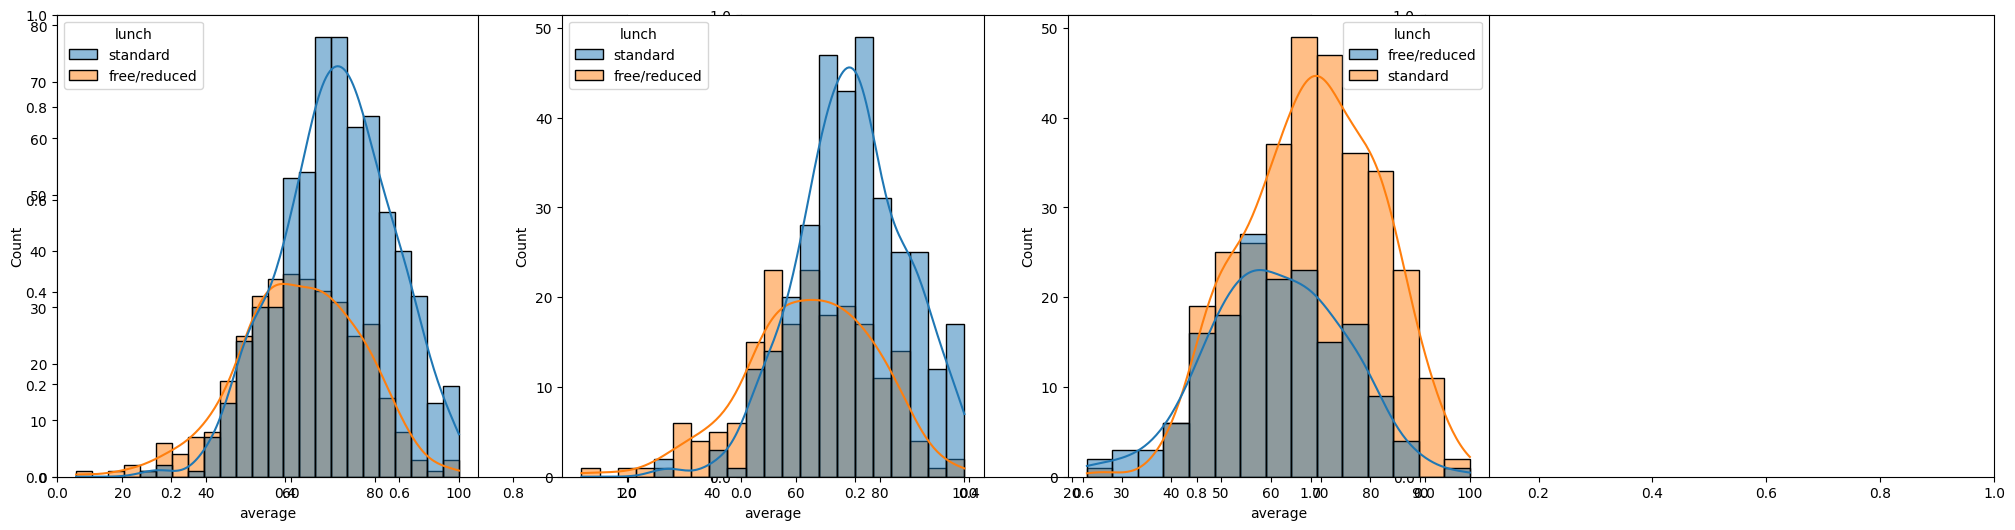

In [15]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

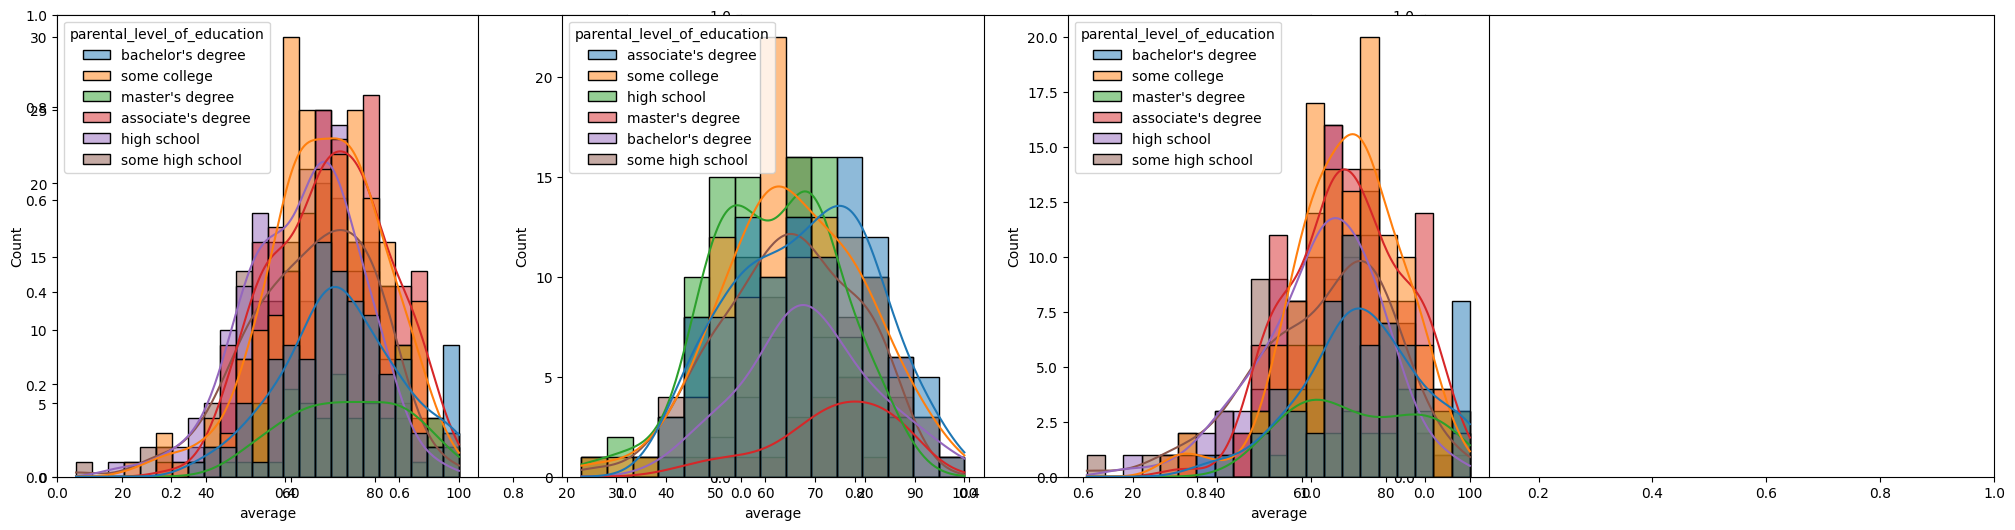

In [16]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

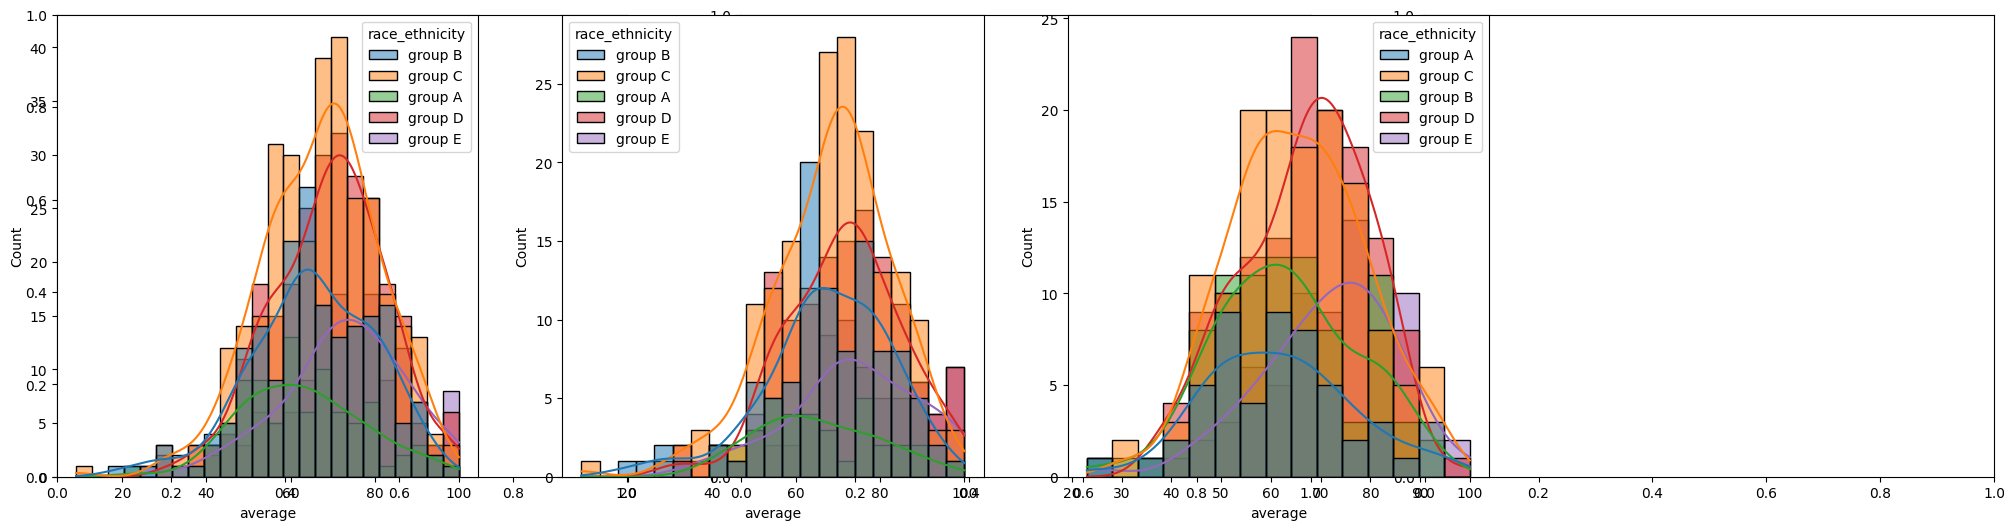

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()


## Insights
Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### Maximum score of students in all three subjects

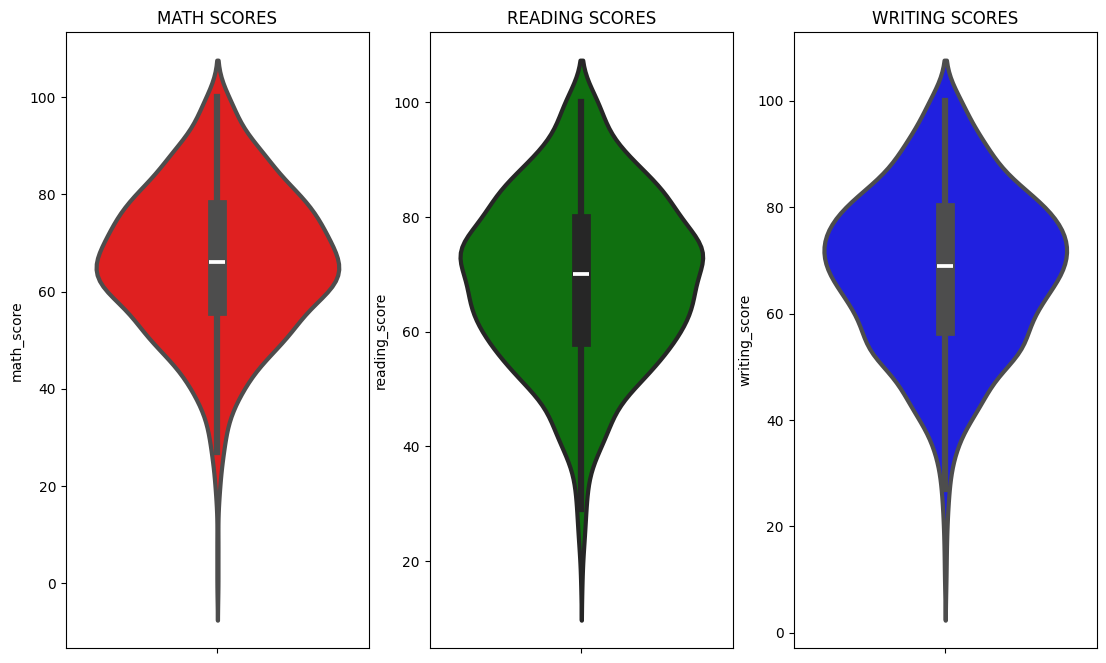

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()



#### Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

### Multivariate analysis using pieplot


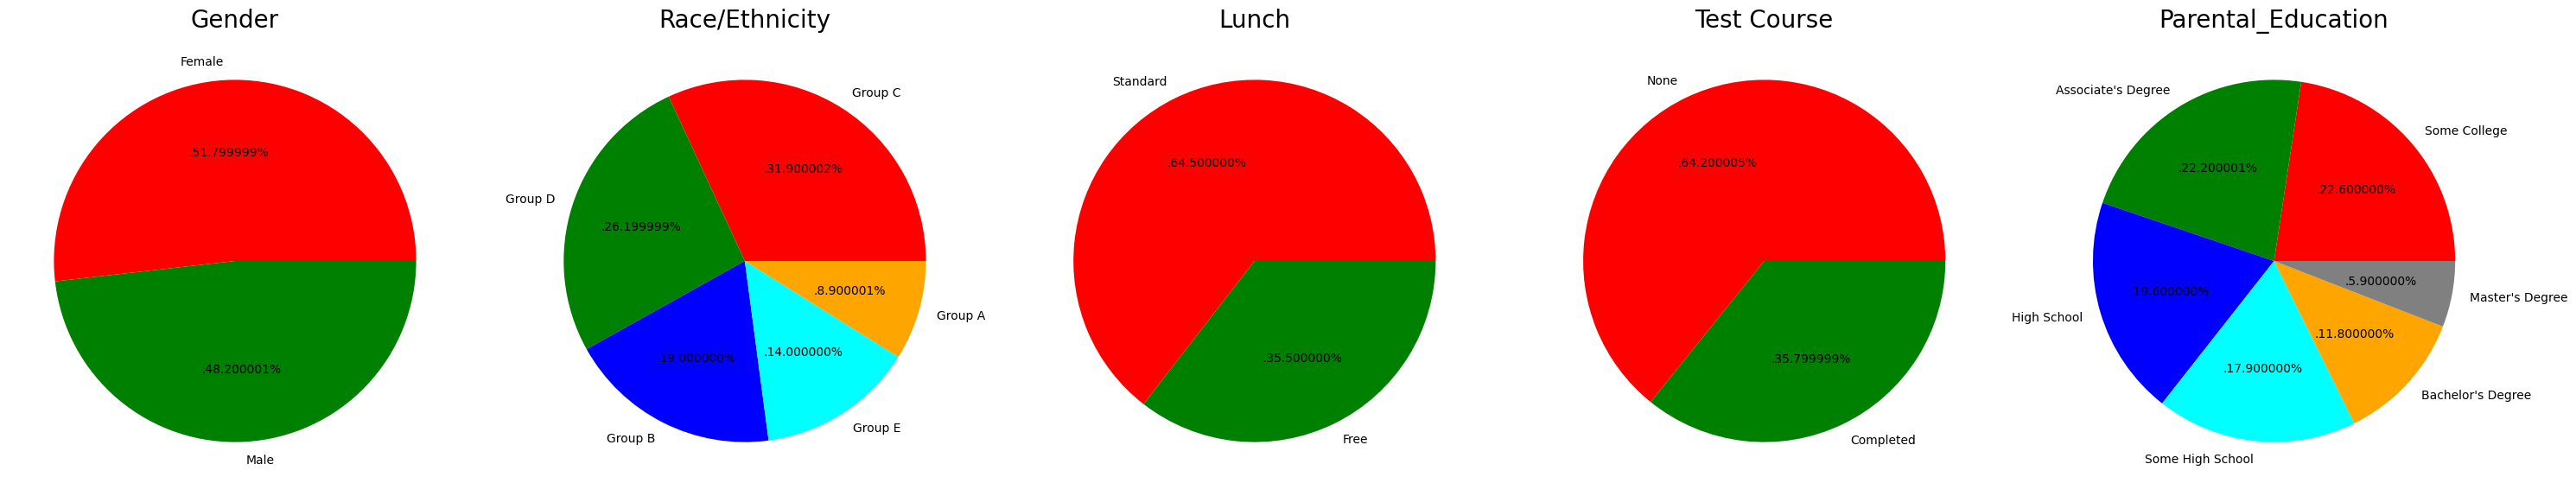

In [22]:

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater
    
Number of students who have not enrolled in any test preparation course is greater
    
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree

### Checking Outliers

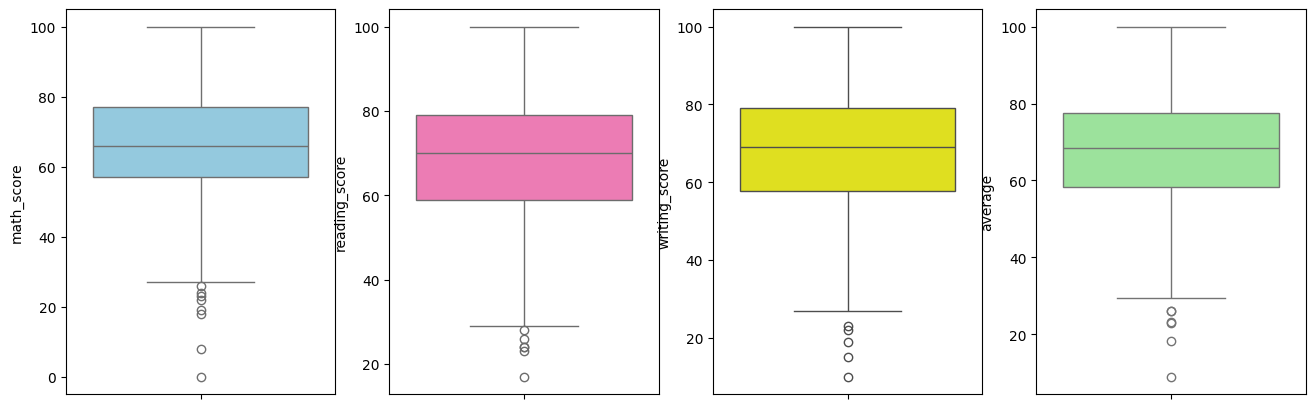

In [24]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()